In [1]:
from utils.game_map_class import GameMap
from utils.game_team_class import GameTeam
from utils.strategy_class import Strategy, RandomStrategy, RuleOfThumbStrategy, LookaheadRolloutStrategy
from utils.map_setup_functions import setGameBoardRandom, initializeFullRiskMap, setGameBoardRandomWithTroops
from utils.heuristics import BST_Heuristic, EdgeWin, Countries_Heuristic, BSR_Heuristic
import numpy as np

In [2]:
full_risk_map = initializeFullRiskMap()
team_names = ["blue", "red"]
team_strategies = [LookaheadRolloutStrategy, RuleOfThumbStrategy]
risk_map, teams = setGameBoardRandomWithTroops(team_names, full_risk_map, team_strategies)
#risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)

In [3]:
[(country, risk_map.getTroops(country)) for country in risk_map.getTerritories()]

[('Alaska', 3),
 ('North West Territory', 2),
 ('Alberta', 2),
 ('Ontario', 1),
 ('Quebec', 2),
 ('Western United States', 2),
 ('Eastern United States', 2),
 ('Central America', 1),
 ('Greenland', 3),
 ('Venezuela', 2),
 ('Brazil', 1),
 ('Peru', 3),
 ('Argentina', 3),
 ('Iceland', 2),
 ('Great Britain', 2),
 ('Western Europe', 2),
 ('Northern Europe', 1),
 ('Southern Europe', 1),
 ('Ukraine', 1),
 ('Scandinavia', 1),
 ('Middle East', 3),
 ('Afghanistan', 2),
 ('Ural', 2),
 ('Siberia', 3),
 ('Yakutsk', 1),
 ('Irkutsk', 1),
 ('Mongolia', 1),
 ('China', 2),
 ('India', 3),
 ('Siam', 1),
 ('Kamchatka', 2),
 ('Japan', 2),
 ('Indonesia', 1),
 ('New Guinea', 3),
 ('Western Australia', 1),
 ('Eastern Australia', 2),
 ('Egypt', 3),
 ('North Africa', 1),
 ('East Africa', 3),
 ('Congo', 2),
 ('South Africa', 3),
 ('Madagascar', 1)]

In [4]:
teams[0].getTerritories()

['Great Britain',
 'Southern Europe',
 'Scandinavia',
 'Irkutsk',
 'Japan',
 'Northern Europe',
 'Ontario',
 'Egypt',
 'Afghanistan',
 'Kamchatka',
 'Western Australia',
 'Congo',
 'Eastern Australia',
 'East Africa',
 'Venezuela',
 'Alberta',
 'Argentina',
 'Siberia',
 'Yakutsk',
 'Eastern United States',
 'New Guinea']

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
pos = {}

pos['Alaska'] = (1,7)
pos['North West Territory'] = (2,7)
pos['Greenland'] = (3,7)
pos['Iceland'] = (4,7)
pos['Scandinavia'] = (5,7)
pos['Alberta'] = (1,6)
pos['Ontario'] = (2,6)
pos['Quebec'] = (3,6)
pos['Great Britain'] = (4,6)
pos['Northern Europe'] = (5,6)
pos['Ukraine'] = (6,6)
pos['Ural'] = (7,6)
pos['Siberia'] = (8,6)
pos['Irkutsk'] = (9,6)
pos['Japan'] = (10,6)
pos['Yakutsk'] = (9,7)
pos['Kamchatka'] = (10,7)
pos['Western United States'] = (1,5)
pos['Eastern United States'] = (2,5)
pos['Western Europe'] = (4,5)
pos['Southern Europe'] = (5,5)
pos['Afghanistan'] = (7,5)
pos['China'] = (8,5)
pos['Mongolia'] = (9,5)
pos['Central America'] = (1,4)
pos['Middle East'] = (7, 4)
pos['India'] = (8,4)
pos['Siam'] = (9,4)
pos['Venezuela'] = (1,3)
pos['Brazil'] = (2,3)
pos['North Africa'] = (4,4)
pos['Egypt'] = (5,4)
pos['Congo'] = (4,3)
pos['East Africa'] = (5,3)
pos['Peru'] = (1,2)
pos['Argentina'] = (2,2)
pos['South Africa'] = (4,2)
pos['Madagascar'] = (5,2)
pos['Indonesia'] = (9,3)
pos['New Guinea'] = (10,3)
pos['Western Australia'] = (9,2)
pos['Eastern Australia'] = (10,2)

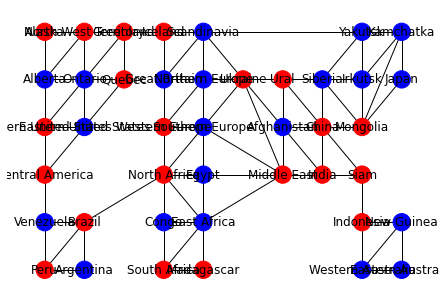

In [7]:
color_map = risk_map.getTeamColorMap()
nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)

In [8]:
teams[0].addTroops('Venezuela', -3)
teams[0].addTroops('Madagascar', -3)

teams[0].getNextMove(depth_ = 1, print_ = True)

Exception: Resulting number of troops cannot be negative

In [ ]:
full_risk_map = initializeFullRiskMap()
team_names = ["blue", "red"]
team_strategies = [LookaheadRolloutStrategy, LookaheadRolloutStrategy]
Heuristics = [BSR_Heuristic, EdgeWin]
#team_strategies = [LookaheadRolloutStrategy, RuleOfThumbStrategy]
risk_map, teams = setGameBoardRandomWithTroops(team_names, full_risk_map, strategy_classes = team_strategies, heuristics = Heuristics)
curr_team = teams[0]
defending_team = teams[1]

counter = 0
while defending_team.hasTeamWon() == False:
    nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
    color_map = risk_map.getTeamColorMap()
    nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
    plt.show()
    curr_team.playTurn(depth_ = 1, print_ = False)
    curr_team_temp = curr_team
    curr_team = defending_team
    defending_team = curr_team_temp
    
    counter += 1
print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))

In [ ]:
full_risk_map = initializeFullRiskMap()
team_names = ["blue", "red"]
team_strategies = [LookaheadRolloutStrategy, LookaheadRolloutStrategy]
#team_strategies = [LookaheadRolloutStrategy, RuleOfThumbStrategy]
risk_map, teams = setGameBoardRandomWithTroops(team_names, full_risk_map, strategy_classes = team_strategies, heuristics = [EdgeWin, BSR_Heuristic])
curr_team = teams[0]
defending_team = teams[1]


In [ ]:
import numpy as np

In [ ]:
%%capture
import random
winner_array = []
winner_count = []
starter_array = []
#winner_array = np.load('winners-look-vs-random.npy').tolist()
#winner_count = np.load('winners_count-look-vs-random.npy').tolist()
#starter_array = np.load('starters-look-vs-random.npy').tolist()
    
   
#winner_array = np.load('winners.npy').tolist()

#starter_array = np.load('starters.npy').tolist()
for _ in range(1):
    full_risk_map = initializeFullRiskMap()
    if random.choice([0, 1]) == 0:
        team_names = ["blue", "red"]
        team_strategies = [RuleOfThumbStrategy, RandomStrategy]
        starter_array.append("blue")
    else:
        team_names = ["red", "blue"]
        team_strategies = [RandomStrategy, RuleOfThumbStrategy]
        starter_array.append("red")
        
    risk_map, teams = setGameBoardRandomWithTroops(team_names, full_risk_map, team_strategies)
    #risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)
    curr_team = teams[0]
    defending_team = teams[1]
    counter = 0
    winner = True
    while defending_team.hasTeamWon() == False:
        curr_team.playTurn(depth_ = 4)
        curr_team_temp = curr_team
        curr_team = defending_team
        defending_team = curr_team_temp
        color_map = risk_map.getTeamColorMap()
        nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
        plt.show()
        counter += 1
        if counter > 50:
            winner = False
            break
    if not winner:
        continue
    
    winner_array.append(defending_team.getName())
    winner_count.append(counter // 2)
    
    np.save('winners-rule-vs-random.npy', np.array(winner_array))
    np.save('starters-rule-vs-random.npy', np.array(starter_array))
    np.save('winners_count-rule-vs-random.npy', np.array(winner_count))
    print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))
    
    
    

In [ ]:
%%capture
import random
winner_array = []
winner_count = []
starter_array = []
winner_array = np.load('winners-with-initial-troops.npy').tolist()

starter_array = np.load('starters-with-initial-troops.npy').tolist()
winner_count = np.load('winners_count-with-initial-troops.npy').tolist()
for _ in range(100):
    full_risk_map = initializeFullRiskMap()
    if random.choice([0, 1]) == 0:
        team_names = ["blue", "red"]
        team_strategies = [LookaheadRolloutStrategy, RuleOfThumbStrategy]
        starter_array.append("blue")
    else:
        team_names = ["red", "blue"]
        team_strategies = [RuleOfThumbStrategy, LookaheadRolloutStrategy]
        starter_array.append("red")
        
    risk_map, teams = setGameBoardRandomWithTroops(team_names, full_risk_map, team_strategies)
    #risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)
    curr_team = teams[0]
    defending_team = teams[1]
    counter = 0
    winner = True
    while defending_team.hasTeamWon() == False:
        curr_team.playTurn(depth_ = 4)
        curr_team_temp = curr_team
        curr_team = defending_team
        defending_team = curr_team_temp
        color_map = risk_map.getTeamColorMap()
        nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
        plt.show()
        counter += 1
        if counter > 50:
            winner = False
            break
    if not winner:
        continue
    winner_array.append(defending_team.getName())
    winner_count.append(counter // 2)
    
    np.save('winners-with-initial-troops.npy', np.array(winner_array))
    np.save('starters-with-initial-troops.npy', np.array(starter_array))
    np.save('winners_count-with-initial-troops.npy', np.array(winner_count))
    print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))
    
    
    

In [ ]:
%%capture
import random
winner_array = []
winner_count = []
starter_array = []
winner_array = np.load('winners-with-continent-bonuses.npy').tolist()

starter_array = np.load('starters-with-continent-bonuses.npy').tolist()
winner_count = np.load('winners_count-with-continent-bonuses.npy').tolist()
for _ in range(68):
    full_risk_map = initializeFullRiskMap()
    if random.choice([0, 1]) == 0:
        team_names = ["blue", "red"]
        team_strategies = [LookaheadRolloutStrategy, RuleOfThumbStrategy]
        starter_array.append("blue")
    else:
        team_names = ["red", "blue"]
        team_strategies = [RuleOfThumbStrategy, LookaheadRolloutStrategy]
        starter_array.append("red")
        
    risk_map, teams = setGameBoardRandomWithTroops(team_names, full_risk_map, team_strategies)
    #risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)
    curr_team = teams[0]
    defending_team = teams[1]
    counter = 0
    winner = True
    while defending_team.hasTeamWon() == False:
        curr_team.playTurn(depth_ = 4)
        curr_team_temp = curr_team
        curr_team = defending_team
        defending_team = curr_team_temp
        color_map = risk_map.getTeamColorMap()
        nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
        plt.show()
        counter += 1
        if counter > 50:
            winner = False
            break
    if not winner:
        continue
    winner_array.append(defending_team.getName())
    winner_count.append(counter // 2)
    
    np.save('winners-with-continent-bonuses.npy', np.array(winner_array))
    np.save('starters-with-continent-bonuses.npy', np.array(starter_array))
    np.save('winners_count-with-continent-bonuses.npy', np.array(winner_count))
    print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))
    
    
    

In [10]:
%%capture
import random
winner_array = []
winner_count = []
starter_array = []
winner_array = np.load('winners-lookahead-edge-vs-BSR-2.npy').tolist()

starter_array = np.load('starters-lookahead-edge-vs-BSR-2.npy').tolist()
winner_count = np.load('winners_count-lookahead-edge-vs-BSR-2.npy').tolist()
for _ in range(10):
    full_risk_map = initializeFullRiskMap()
    if random.choice([0, 1]) == 0:
        team_names = ["blue", "red"]
        team_strategies = [LookaheadRolloutStrategy, LookaheadRolloutStrategy]
        heuristics = [EdgeWin, BSR_Heuristic]
        starter_array.append("blue")
    else:
        team_names = ["red", "blue"]
        team_strategies = [LookaheadRolloutStrategy, LookaheadRolloutStrategy]
        heuristics = [BSR_Heuristic, EdgeWin]
        starter_array.append("red")
        
    risk_map, teams = setGameBoardRandomWithTroops(team_names, full_risk_map,  heuristics, team_strategies)
    #risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)
    curr_team = teams[0]
    defending_team = teams[1]
    counter = 0
    winner = True
    while defending_team.hasTeamWon() == False:
        curr_team.playTurn(depth_ = 4)
        curr_team_temp = curr_team
        curr_team = defending_team
        defending_team = curr_team_temp
        color_map = risk_map.getTeamColorMap()
        nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
        plt.show()
        counter += 1
        if counter > 50:
            winner = False
            break
    if not winner:
        continue
    winner_array.append(defending_team.getName())
    winner_count.append(counter // 2)
    
    np.save('winners-lookahead-edge-vs-BSR-2.npy', np.array(winner_array))
    np.save('starters-lookahead-edge-vs-BSR-2.npy', np.array(starter_array))
    np.save('winners_count-lookahead-edge-vs-BSR-2.npy', np.array(winner_count))
    print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))
    
    
    

In [ ]:
%%capture
import random
winner_array = []
winner_count = []
starter_array = []
'''
winner_array = np.load('winners-lookahead-edge-vs-countries.npy').tolist()
starter_array = np.load('starters-lookahead-edge-vs-countries.npy').tolist()
winner_count = np.load('winners_count-lookahead-edge-vs-countries.npy').tolist()
'''
for _ in range(90):
    full_risk_map = initializeFullRiskMap()
    if random.choice([0, 1]) == 0:
        team_names = ["blue", "red"]
        team_strategies = [LookaheadRolloutStrategy, LookaheadRolloutStrategy]
        heuristics = [EdgeWin, Countries_Heuristic]
        starter_array.append("blue")
    else:
        team_names = ["red", "blue"]
        team_strategies = [LookaheadRolloutStrategy, LookaheadRolloutStrategy]
        heuristics = [Countries_Heuristic, EdgeWin]
        starter_array.append("red")
        
    risk_map, teams = setGameBoardRandomWithTroops(team_names, full_risk_map,  heuristics, team_strategies)
    #risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)
    curr_team = teams[0]
    defending_team = teams[1]
    counter = 0
    winner = True
    while defending_team.hasTeamWon() == False:
        curr_team.playTurn(depth_ = 4)
        curr_team_temp = curr_team
        curr_team = defending_team
        defending_team = curr_team_temp
        color_map = risk_map.getTeamColorMap()
        nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
        plt.show()
        counter += 1
        if counter > 50:
            winner = False
            break
    if not winner:
        continue
    winner_array.append(defending_team.getName())
    winner_count.append(counter // 2)
    
    np.save('winners-lookahead-edge-vs-countries.npy', np.array(winner_array))
    np.save('starters-lookahead-edge-vs-countries.npy', np.array(starter_array))
    np.save('winners_count-lookahead-edge-vs-countries.npy', np.array(winner_count))
    print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))
    
    
    

In [ ]:
import numpy as np

In [ ]:
c = 0
for i in range(len(a)):
    ai = a[i]
    bi = b[i]
    if ai == 'blue':
        c += 1
c
        